In [1]:
# Name: AAGAZ SANJARI
# Roll no.: 01
#sec: C
#subject: ET1

# To perform and analysis of Logistic Regression Algorithm

# Importing the Libraries

In [2]:
import pandas as pd 
import numpy as np

# Data acquisitionuing Pandas 

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\ASUS'

In [5]:
os.chdir("C:\\Users\\ASUS\\OneDrive\\Desktop")

In [6]:
data=pd.read_csv("heart.csv")

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.shape

(1025, 14)

In [12]:
data.size

14350

In [13]:
data.ndim

2

In [14]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Data preprocessing _ data cleaning _ missing value treatment

In [15]:
# check Missing Value by record 

data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [17]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Independent and Dependent Variables


In [18]:
x=data.drop("target", axis=1)
y=data["target"]

# Splitting of DataSet into train and Test¶

In [19]:
#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=42)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log = LogisticRegression()
log.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred1 = log.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score 

In [24]:
accuracy_score (y_test,y_pred1)


0.7853658536585366

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(y_test, y_pred1)

In [27]:
labels = np.unique(y_test)  # Get unique class labels
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

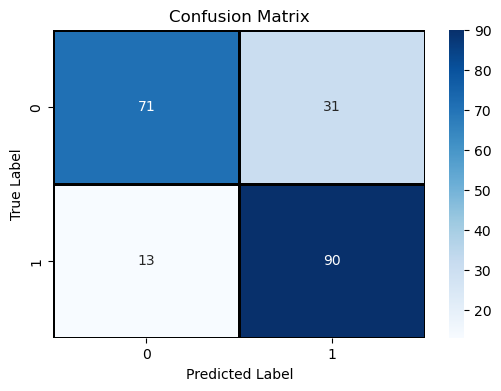

In [28]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 


In [30]:
knn=KNeighborsClassifier()

In [31]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred2=knn.predict(x_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred2)

In [34]:
accuracy

0.7317073170731707

# Support Vector Classifier / Machine (SVC/SVM)

In [35]:
from sklearn import svm
svm=svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [36]:
y_pred3=svm.predict(x_test)

In [37]:
accuracy_score (y_test,y_pred3)

0.6829268292682927

# Decision Trees Algorithm

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt=DecisionTreeClassifier()

In [40]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred4=dt.predict(x_test)

In [42]:
accuracy_score (y_test,y_pred4)

0.9853658536585366

# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf=RandomForestClassifier()

In [45]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
y_pred5=rf.predict(x_test)

In [47]:
accuracy_score (y_test,y_pred5)

0.9853658536585366

In [48]:
import pandas as pd

In [49]:
data = {
    'Classifier': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN'],
    'Accuracy': [0.78, 0.98, 0.98, 0.68, 0.73]
}

In [50]:
df = pd.DataFrame(data)

In [51]:
print(df)

            Classifier  Accuracy
0  Logistic Regression      0.78
1        Decision Tree      0.98
2        Random Forest      0.98
3                  SVM      0.68
4                  KNN      0.73


In [52]:
best_model = df.loc[df['Accuracy'].idxmax()]
print("Best Model:")
print(best_model)


Best Model:
Classifier    Decision Tree
Accuracy               0.98
Name: 1, dtype: object


In [53]:
import matplotlib.pyplot as plt

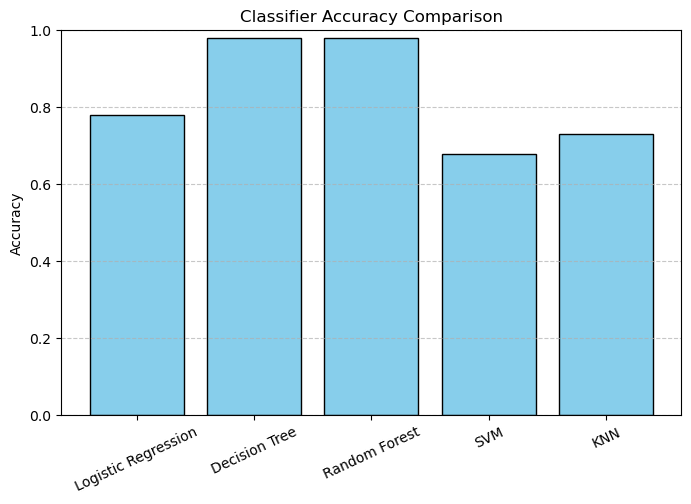

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df['Classifier'], df['Accuracy'], color='skyblue', edgecolor='black')
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [55]:
import pandas as pd

In [56]:
classifier_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
accuracies = [0.78, 0.98, 0.98, 0.68, 0.73]

In [57]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

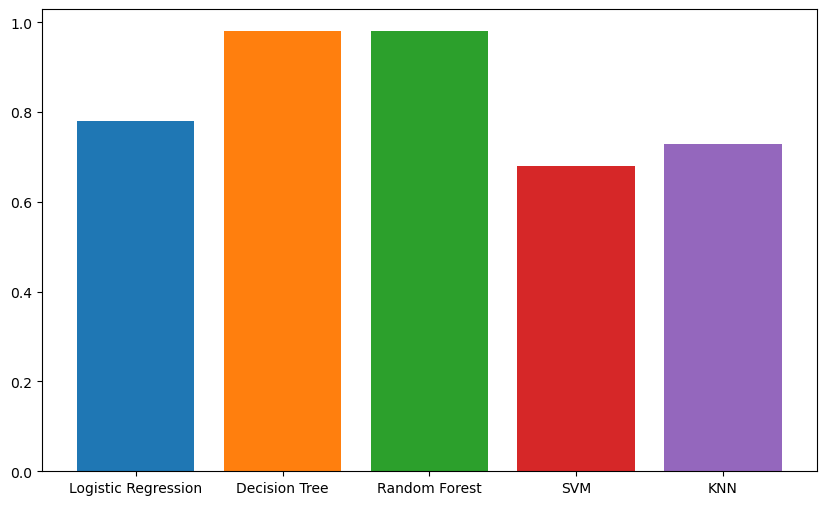

In [58]:
plt.figure(figsize=(10, 6))
bars = plt.bar(classifier_names, accuracies, color=colors)

In [59]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)

In [62]:
bagged_rf = BaggingClassifier(estimator=rf, n_estimators=10, random_state=42)
bagged_rf.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(n_estimators=50,
                                                   random_state=42),
                  random_state=42)

In [63]:
y_pred = bagged_rf.predict(X_test)
print("Bagging on Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Bagging on Random Forest Accuracy: 1.0
